In [60]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers , regularizers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler


In [13]:
df = pd.read_excel("../../data/bandwidth_video_quality_with_bitrate_V2.xlsx")
features = np.array(df["Bandwidth (Mbps)"]).reshape(-1,1)
target= np.array(df["Bitrate (Mbps)"])
print(features.shape)
print(target.shape)


(233, 1)
(233,)


In [14]:
X_train , X_test , y_train , y_test = train_test_split(features,target,test_size=0.33)

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit(y_train)
x_test_scaled = scaler.fit_transform(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.3 1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.3 1.  0.3 1.  1.  1.  1.
 1.  1.  0.3 1.  1.  1.  1.  1.  1.  1.  0.3 1.  1.  1.  1.  0.3 0.3 1.
 1.  1.  0.3 1.  2.5 0.3 0.3 0.3 1.  1.  0.3 1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.3 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.3 1.  1.  1.  1.
 1.  1.  1.  2.5 0.3 1.  1.  1.  0.3 0.3 0.3 1.  0.3 1.  0.3 0.3 1.  1.
 1.  1.  1.  0.3 1.  2.5 1.  0.3 1.  0.3 1.  0.3 0.3 0.3 2.5 0.3 0.3 1.
 1.  1.  0.3 1.  1.  1.  0.3 1.  1.  1.  0.3 1.  0.3 0.3 1.  0.3 1.  1.
 1.  1.  1.  0.3 1.  0.3 1.  1.  1.  0.3 1.  0.3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [53]:
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=1)
])
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error'])
model.fit(x_train_scaled, y_train,epochs=100, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6326 - mean_absolute_error: 0.7025 - val_loss: 0.3008 - val_mean_absolute_error: 0.4852
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2411 - mean_absolute_error: 0.4247 - val_loss: 0.2581 - val_mean_absolute_error: 0.4671
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1510 - mean_absolute_error: 0.3555 - val_loss: 0.1265 - val_mean_absolute_error: 0.3252
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1042 - mean_absolute_error: 0.2733 - val_loss: 0.0692 - val_mean_absolute_error: 0.2199
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.2190 - val_loss: 0.0387 - val_mean_absolute_error: 0.1512
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0394 - mean_absolute_error: 0.1414 - val_loss: 0.0327 - val_mean_absolute_error: 0.1299
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0627 - mean_absolute_error: 0.1747 - val_loss

In [58]:

y_pred = model.predict(x_test_scaled)
score = r2_score(y_pred,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


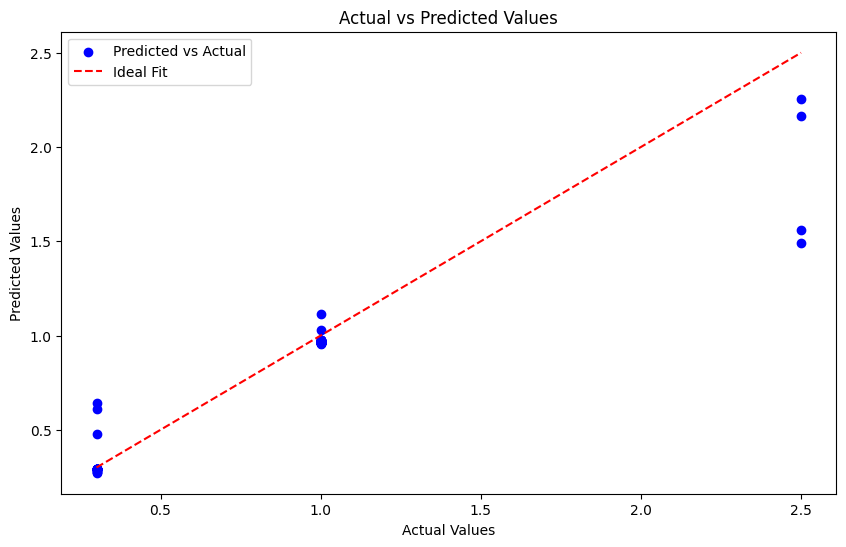

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [61]:
model_l2 = tf.keras.Sequential([
    layers.Dense(1, input_shape=(1,), kernel_regularizer=regularizers.l2(0.01))  # L2 Regularization
])

# Compile model
model_l2.compile(optimizer='adam', loss='mean_squared_error')

# Train model

d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
history_l2 = model_l2.fit(x_train_scaled, y_train, epochs=100, verbose=0)


In [71]:
y_pred = model_l2.predict(x_test_scaled)
y_pred = scaler.inverse_transform(y_pred)
# socre = r2_score(y_pred,y_test)
y_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


array([0.3, 1. , 1. , 1. , 1. , 1. , 0.3, 1. , 1. , 0.3, 1. , 1. , 0.3,
       1. , 1. , 1. , 1. , 0.3, 0.3, 1. , 0.3, 0.3, 1. , 1. , 0.3, 0.3,
       2.5, 0.3, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.3, 2.5,
       1. , 1. , 0.3, 2.5, 1. , 1. , 0.3, 0.3, 1. , 1. , 0.3, 1. , 0.3,
       1. , 1. , 1. , 1. , 1. , 1. , 0.3, 1. , 0.3, 0.3, 1. , 1. , 0.3,
       1. , 0.3, 1. , 1. , 1. , 1. , 0.3, 1. , 1. , 0.3, 1. , 2.5])